ME233 Final Project

0. Load python packages

In [ ]:
# # the current colab versions are not compatible with this notebook so we need to install these older package versions
!pip install matplotlib==3.2.2
!pip install tensorflow==2.12.0
!pip install numpy==1.23.5
!pip install pandas==1.5.3
# do not restart the runtime until all packages have been installed (hit cancel on the pop-up)!!
# the errors in red that print out can be ignored; they will not affect this code

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.2-cp311-cp311-linux_x86_64.whl size=11975917 sha256=c281a191d2f8912ea304a81c14b1c64196b6404e4b1a5f9f6cd676924e918dfb
  Stored in directory: /root/.cache/pip/wheels/24/49/a7/b00a675ec9397a601599e7d1e21489f0d9d6eb7871f5f38957
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, but you have matplotlib 3.2.2 which is incompatible.
bigframes 1.36.0 requires matplotlib>=3.7.1, but you have matplotlib 3.2.2 which is incompatible.
arviz 0.20.0 requires 

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninsta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.12.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
seaborn 0.13.2 requires matplotlib!=3.6.1,>=3.4, but you have matplotlib 3.2.2 which is incompatible.
bigframes 1.36.0 requires matplotlib>=3.7.1, but you have matplotlib 3.2.2 which is incompatible.
bigframes 1.36.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
arviz 0.20.0 requires matplotlib>=3.5, but you have matplotlib 3.2.2 which is incompatible.
pymc 5.20.1 requires

0.1 Check Python Package

In [ ]:
# import necessary python packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
import json
import pandas as pd
import os
import copy
from sklearn.metrics import r2_score


# Check Versions
print('Numpy: ' + np.__version__) # 1.23.5
print('Matplotlib: ' + matplotlib.__version__) # 3.2.2
print('Tensorflow: ' + tf.__version__) # 2.12.0
print('Keras: ' + keras.__version__)
print('Pandas: ' + pd.__version__) # 1.5.3

Numpy: 1.23.5
Matplotlib: 3.2.2
Tensorflow: 2.12.0
Keras: 2.12.0
Pandas: 1.5.3


0.2 Mount Drive

In [ ]:
#Import excel file, change to match where you saved the file
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/ME233/project/input/' # change to where you download this; must be in Google Drive
dfs = pd.read_excel(path + 'CANNsEcoflexData.xlsx', sheet_name='Sheet1')
# Add skin data
dfs_skin = pd.read_excel(path + 'skin_data_uniaxial.xlsx', sheet_name='Sheet1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.2.1 make path to save result

In [ ]:
# Make path to save results to
def makeDIR(path):
    if not os.path.exists(path):
        os.makedirs(path)

filename = 'EcoflexCANN' # Change to keep track of different data e.g. Brain, Skin, Muscle, etc.
path2saveRaw = path + 'Results/'+filename+'/RawData'
makeDIR(path2saveRaw)

1. load Ecoflex uniaxial tension test data

In [ ]:
# Load data for different Ecoflex test
def getStressStrain(Region):

    if Region =='Vol0.3':
        P_18 = dfs.iloc[3:,1].dropna().astype(np.float64)
        lam_18 = dfs.iloc[3:,0].dropna().astype(np.float64)

        P_180 = dfs.iloc[3:,3].dropna().astype(np.float64).values
        lam_180 = dfs.iloc[3:,2].dropna().astype(np.float64).values

        P_900 = dfs.iloc[3:,5].dropna().astype(np.float64).values
        lam_900 = dfs.iloc[3:,4].dropna().astype(np.float64).values

    elif Region =='Vol0.2':
        P_18 = dfs.iloc[3:,8].dropna().astype(np.float64)
        lam_18 = dfs.iloc[3:,7].dropna().astype(np.float64)

        P_180 = dfs.iloc[3:,10].dropna().astype(np.float64).values
        lam_180 = dfs.iloc[3:,9].dropna().astype(np.float64).values

        P_900 = dfs.iloc[3:,12].dropna().astype(np.float64).values
        lam_900 = dfs.iloc[3:,11].dropna().astype(np.float64).values

    elif Region =='Vol0.1':
        P_18 = dfs.iloc[3:,15].dropna().astype(np.float64)
        lam_18 = dfs.iloc[3:,14].dropna().astype(np.float64)

        P_180 = dfs.iloc[3:,17].dropna().astype(np.float64).values
        lam_180 = dfs.iloc[3:,16].dropna().astype(np.float64).values

        P_900 = dfs.iloc[3:,19].dropna().astype(np.float64).values
        lam_900 = dfs.iloc[3:,18].dropna().astype(np.float64).values


    return P_18, lam_18, P_180, lam_180, P_900, lam_900

# Define different loading protocols
def traindata(modelFit_mode):
    if modelFit_mode == '18':
        model_given = model_UT
        input_train = lam_18
        output_train = P_18
        sample_weights = np.array([1.0]*input_train.shape[0])

    elif modelFit_mode == "180":
        model_given = model_UT
        input_train = lam_180
        output_train = P_180
        sample_weights = np.array([1.0]*input_train.shape[0])

    elif modelFit_mode == "900":
        model_given = model_UT
        input_train = lam_900
        output_train = P_900
        sample_weights = np.array([1.0]*input_train.shape[0])


    return model_given, input_train, output_train, sample_weights

In [ ]:
# Get skin data
subject_map = {
    'F':
    {
        'Right': 0,
        'Left': 2,
    },
    'E':
    {
        'Right': 4,
        'Left': 6,
    },
    'D':
    {
        'Right': 8,
        'Left': 10,
    },
    'A':
    {
        'Right': 12,
        'Left': 14,
    },
    'G':
    {
        'Right': 16,
        'Left': 18,
    }
}
def getStressStrain_skin(subject, direction):
    column_lam = int(subject_map[subject][direction])
    column_P = column_lam + 1
    P_skin = dfs_skin.iloc[2:,column_P].dropna().astype(np.float64)
    # -1 is to convert stretch ratio to strain
    lam_skin = dfs_skin.iloc[2:,column_lam].dropna().astype(np.float64)-1

    return P_skin, lam_skin

In [ ]:
# Select Ecoflex to investigate:
Region_test = 'Vol0.2'  # corpus callosum
P_18, lam_18, P_180, lam_180, P_900, lam_900 = getStressStrain(Region_test)

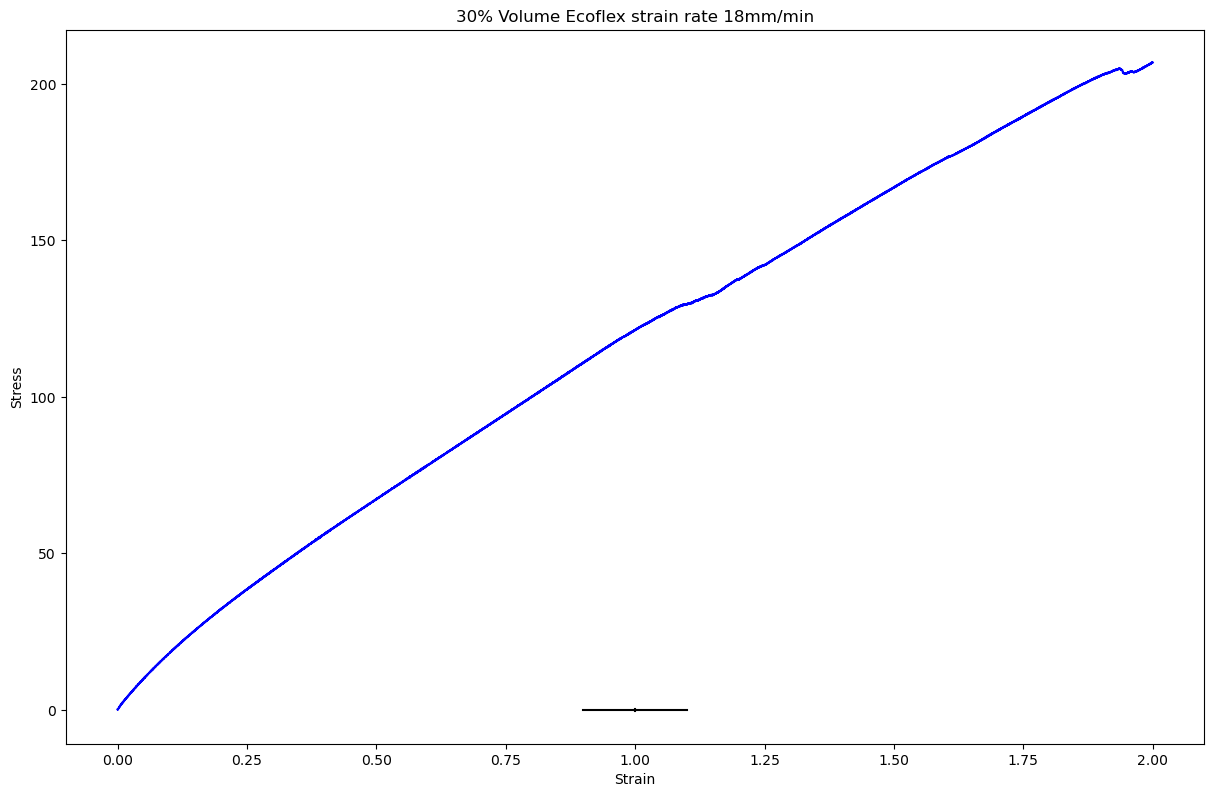

In [ ]:
plt.figure(figsize=(12.5,8.33))
plt.plot(lam_18,P_18,color='blue')
plt.plot(np.linspace(0.9, 1.1, 100), np.linspace(0,0,100),'k')
plt.plot(np.linspace(1, 1, 100), np.linspace(-0.5,0.1,100),'k')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('30% Volume Ecoflex strain rate 18mm/min')
plt.tight_layout(pad=2)
plt.savefig(path2saveRaw + '/' + Region_test + '_TenCom' + '.pdf')

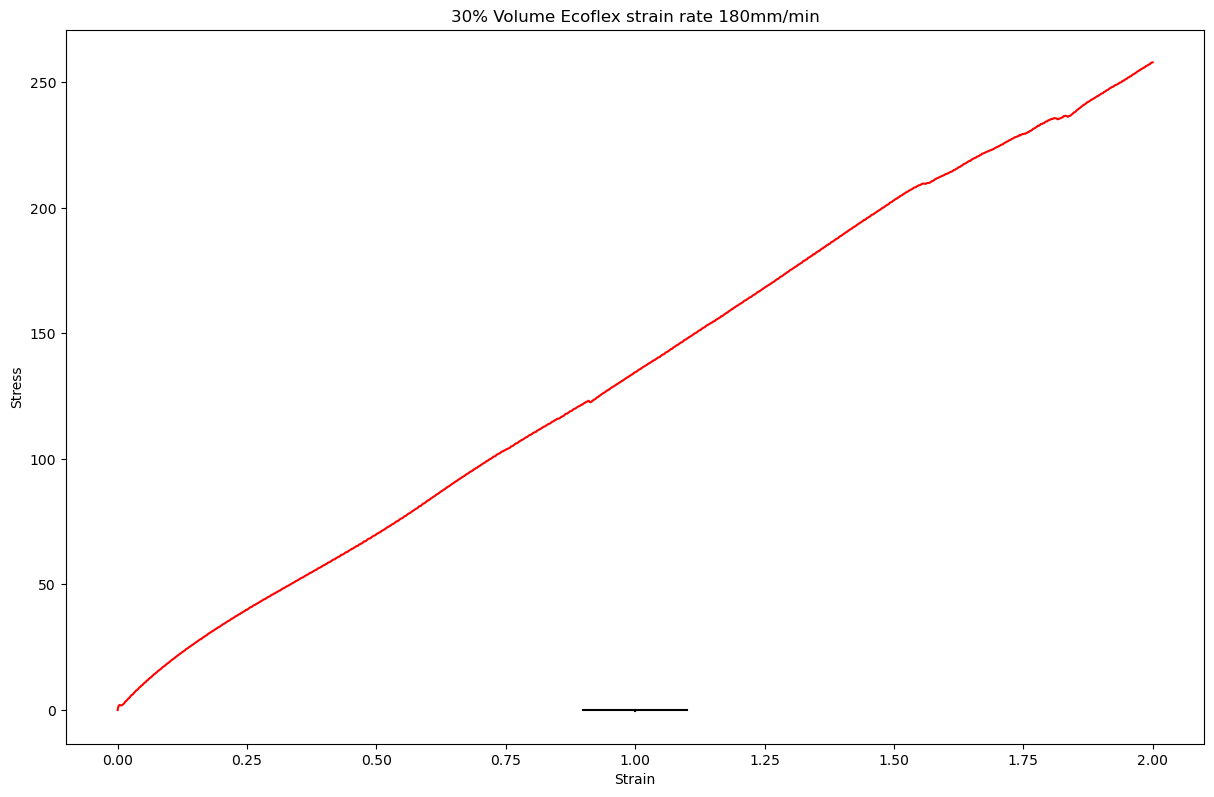

In [ ]:
plt.figure(figsize=(12.5,8.33))
plt.plot(lam_180,P_180,color='red')
plt.plot(np.linspace(0.9, 1.1, 100), np.linspace(0,0,100),'k')
plt.plot(np.linspace(1, 1, 100), np.linspace(-0.5,0.1,100),'k')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('30% Volume Ecoflex strain rate 180mm/min')
plt.tight_layout(pad=2)
plt.savefig(path2saveRaw + '/' + Region_test + '_TenCom' + '.pdf')

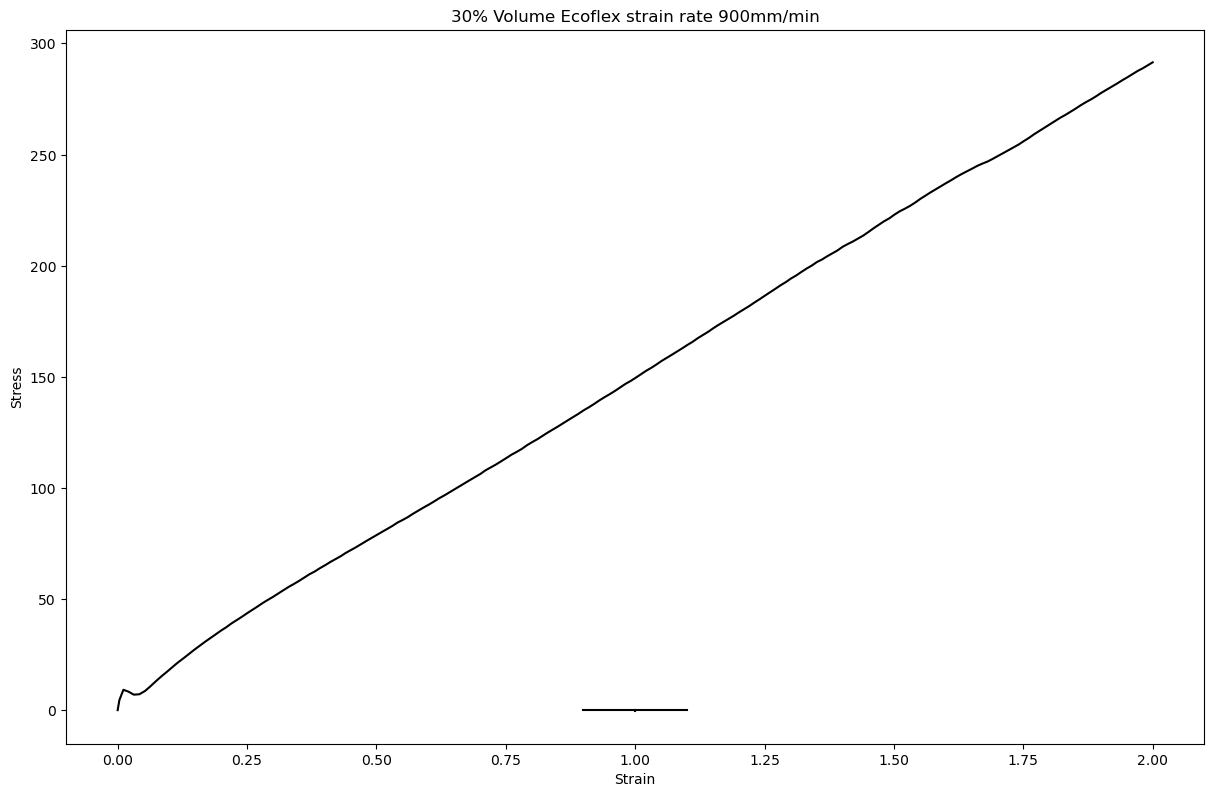

In [ ]:
plt.figure(figsize=(12.5,8.33))
plt.plot(lam_900,P_900,color='black')
plt.plot(np.linspace(0.9, 1.1, 100), np.linspace(0,0,100),'k')
plt.plot(np.linspace(1, 1, 100), np.linspace(-0.5,0.1,100),'k')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('30% Volume Ecoflex strain rate 900mm/min')
plt.tight_layout(pad=2)
plt.savefig(path2saveRaw + '/' + Region_test + '_TenCom' + '.pdf')

Visualize human skin

In [ ]:
# Select human skin data
subject = 'A'  # subject number
direction = 'Right'
P_skin, lam_skin = getStressStrain_skin(subject, direction)

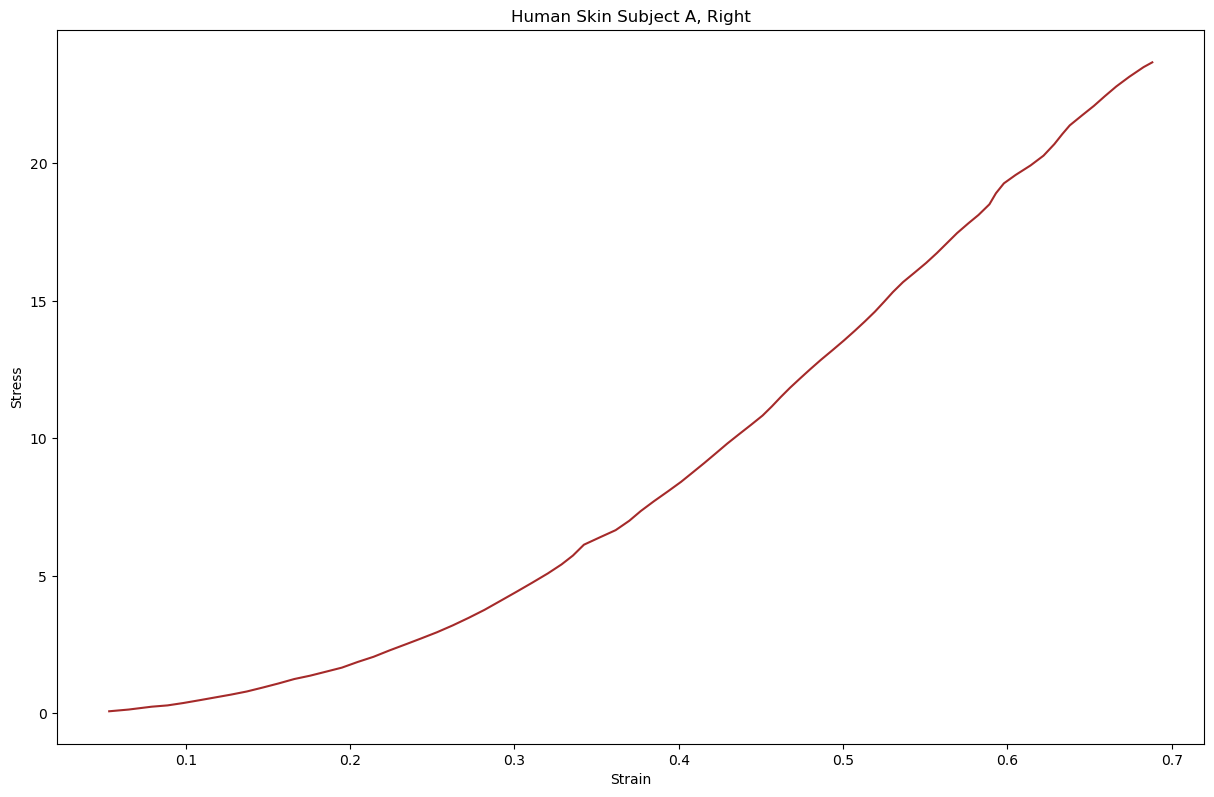

In [ ]:
plt.figure(figsize=(12.5,8.33))
plt.plot(lam_skin, P_skin,color='brown')
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Human Skin Subject A, Right')
plt.tight_layout(pad=2)
# plt.savefig(path2saveRaw + '/' + Region_test + '_TenCom' + '.pdf')

2.0 L1 and L2 regularization with penalty weight

In [ ]:
def regularize(reg, pen):
    if reg == 'L2':
        return keras.regularizers.l2(pen)
    if reg == 'L1':
        return keras.regularizers.l1(pen)

2.1 Strain Energy Model - Invariant-based

2.1.1 Define the activation functions and a single Invariant block:

In [ ]:
initializer_exp = tf.keras.initializers.RandomUniform(minval=0., maxval=0.1, seed=np.random.randint(0,10000)) # use random integer as seed
initializer_1 = 'glorot_normal'

# Self defined activation functions for exp term
def activation_Exp(x):
    return 1.0*(tf.math.exp(x) -1.0)
# Self defined activation functions for ln term
def activation_ln(x):
    return -1.0*tf.math.log(1.0 - (x))

# Define network block
def SingleInvNet(I1_ref, idi, reg, pen):

    # input: invariant
    I_1_w11 = keras.layers.Dense(1,kernel_initializer=initializer_1,kernel_constraint=keras.constraints.NonNeg(),
                                 kernel_regularizer=regularize(reg, pen),
                                 use_bias=False, activation=None,name='w'+str(1+idi)+'1')(I1_ref) # no activation
    I_1_w21 = keras.layers.Dense(1,kernel_initializer=initializer_exp,kernel_constraint=keras.constraints.NonNeg(),
                                 kernel_regularizer=regularize(reg, pen),
                                 use_bias=False, activation=activation_Exp,name='w'+str(2+idi)+'1')(I1_ref) # exp activation

    I_1_w31 = keras.layers.Dense(1,kernel_initializer=initializer_1,kernel_constraint=keras.constraints.NonNeg(),
                                 kernel_regularizer=regularize(reg, pen),
                              use_bias=False, activation=activation_ln,name='w'+str(3+idi)+'1')(I1_ref) # ln activation

    # input: invariant^2
    I_1_w41 = keras.layers.Dense(1,kernel_initializer=initializer_1,kernel_constraint=keras.constraints.NonNeg(),
                                 kernel_regularizer=regularize(reg, pen),
                                 use_bias=False, activation=None,name='w'+str(4+idi)+'1')(tf.math.square(I1_ref)) # no activation
    I_1_w51 = keras.layers.Dense(1,kernel_initializer=initializer_exp,kernel_constraint=keras.constraints.NonNeg(),
                                 kernel_regularizer=regularize(reg, pen),
                                 use_bias=False, activation=activation_Exp,name='w'+str(5+idi)+'1')(tf.math.square(I1_ref)) # exp activation
    I_1_w61 = keras.layers.Dense(1,kernel_initializer=initializer_1,kernel_constraint=keras.constraints.NonNeg(),
                                 kernel_regularizer=regularize(reg, pen),
                              use_bias=False, activation=activation_ln,name='w'+str(6+idi)+'1')(tf.math.square(I1_ref)) # ln activation

    collect = [I_1_w11, I_1_w21, I_1_w31, I_1_w41, I_1_w51, I_1_w61]
    collect_out = tf.keras.layers.concatenate(collect, axis=1)

    return collect_out

2.1.2 Define the strain energy keras submodel

In [ ]:
def StrainEnergyCANN_invariant(reg, pen):

    # Inputs defined
    I1_in = tf.keras.Input(shape=(1,), name='I1')
    I2_in = tf.keras.Input(shape=(1,), name='I2')


    # Put invariants in the reference configuration
    I1_ref = keras.layers.Lambda(lambda x: (x-3.0))(I1_in)
    I2_ref = keras.layers.Lambda(lambda x: (x-3.0))(I2_in)

    I1_out = SingleInvNet(I1_ref, 0, reg, pen)
    terms = I1_out.get_shape().as_list()[1] # 6 terms per invariant
    I2_out = SingleInvNet(I2_ref, terms, reg, pen)

    ALL_I_out = [I1_out, I2_out]
    ALL_I_out = tf.keras.layers.concatenate(ALL_I_out,axis=1)

    # second layer
    W_ANN = keras.layers.Dense(1,kernel_initializer='glorot_normal',kernel_constraint=keras.constraints.NonNeg(),
                               kernel_regularizer=regularize(reg, pen),
                           use_bias=False, activation=None,name='wx2')(ALL_I_out)
    Psi_model = keras.models.Model(inputs=[I1_in, I2_in], outputs=[W_ANN], name='Psi')

    return Psi_model, terms*2  # 12 terms


2.2 Strain Energy Model - Principal-stretch-based

Define the strain energy function for our isotropic, perfectly incompressible Constitutive Artificial Neural Network with one hidden layers and twenty nodes using the principal strain

In [ ]:
def SingleInvNetStretch(I1_ref, reg, pen):
    I_1_w11 = keras.layers.Dense(1, kernel_initializer=initializer_1, kernel_constraint=keras.constraints.NonNeg(),
                                 use_bias=False, activation=None, kernel_regularizer=regularize(reg, pen))(I1_ref)
    return I_1_w11


def princStretch(inputs): # convert invariants to principal stretches
    (I1_in, I2_in) = inputs
    Stretch_1_0 = 1.0

    Q = (tf.math.pow(I1_in, 2) - 3.0 * I2_in) + 0.001
    R = ((-9.0 * I1_in * I2_in) + 27.0 + (2.0 * tf.math.pow(I1_in, 3)))
    Theta = tf.math.acos(R / (2.0 * tf.math.pow(Q, 3 / 2)))

    Stretch_1 = 1.0 / 3.0 * (
                I1_in + 2.0 * tf.math.sqrt(Q) * tf.math.cos(1.0 / 3.0 * (Theta + 2.0 * np.pi * (1.0 - 1.0))))
    Stretch_2 = 1.0 / 3.0 * (
                I1_in + 2.0 * tf.math.sqrt(Q) * tf.math.cos(1.0 / 3.0 * (Theta + 2.0 * np.pi * (2.0 - 1.0))))
    Stretch_3 = 1.0 / 3.0 * (
                I1_in + 2.0 * tf.math.sqrt(Q) * tf.math.cos(1.0 / 3.0 * (Theta + 2.0 * np.pi * (3.0 - 1.0))))

    return tf.math.sqrt(Stretch_1), tf.math.sqrt(Stretch_2), tf.math.sqrt(Stretch_3), Q

def StrainEnergyCANN_stretch(reg, pen):
    # Inputs defined
    I1_in = tf.keras.Input(shape=(1,), name='I1')
    I2_in = tf.keras.Input(shape=(1,), name='I2')
    # Get principal stretches
    Stretch_1, Stretch_2, Stretch_3, Q = keras.layers.Lambda(function=princStretch,
                                                             name='P_stretch')([I1_in, I2_in])
    ALL_I_out_arr = []
    for i in range(-30, 12, 2):  # define range of exponential powers and number of terms
        if i != 0:
            stretch_out = SingleInvNetStretch(Stretch_1 ** i + Stretch_2 ** i + Stretch_3 ** i - 3.0, reg, pen)
            ALL_I_out_arr.append(stretch_out)
    ALL_I_out = tf.keras.layers.concatenate(ALL_I_out_arr, axis=1)
    amount_terms = len(ALL_I_out_arr)

    ### Special cases: NH, BK, 1-term models ###
    # ALL_I_out = SingleInvNetStretch(Stretch_1 ** (-2) + Stretch_2 ** (-2) + Stretch_3 ** (-2) - 3.0, reg, pen)
    # amount_terms = 1
    ####

    Psi_model = keras.models.Model(inputs=[I1_in, I2_in], outputs=[ALL_I_out], name='Psi')

    return Psi_model, amount_terms

3.Stress Models

3.1 Tension

In [ ]:
def Stress_calc_TC(inputs):
    (dPsidI1, dPsidI2, Stretch) = inputs
    one = tf.constant(1.0,dtype='float32')
    two = tf.constant(2.0,dtype='float32')
    minus  = two * (dPsidI1 *  one/ K.square(Stretch)  + dPsidI2 * one/K.pow(Stretch,3))
    stress = two * (dPsidI1 *  Stretch + dPsidI2 * one) - minus

    return stress